In [1]:
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")
os.chdir('/Users/harsha/Desktop/Codedex/archive')

athlete_events = pd.read_csv('athlete_events.csv')
noc_regions = pd.read_csv('noc_regions.csv')

In [2]:
# Removed the 'notes' column from noc_regions
noc_regions_cleaned = noc_regions.drop(columns=['notes'])

# Merged datasets on the 'NOC' column
data = pd.merge(athlete_events, noc_regions_cleaned, on='NOC', how='left')

# Replaced 'NA' values in the 'Medal' column with 'No Medal' and removed 'NOC' and 'ID', Which ig its useless :)
data['Medal'].fillna('No Medal', inplace=True)
data = data.drop(columns=['NOC','ID'])

data.head()

,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal,region
0,A Dijiang,M,24.0,180.0,80.0,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China
1,A Lamusi,M,23.0,170.0,60.0,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,Denmark
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands


In [3]:
data.isnull().sum()

Name          0
Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
region      370
dtype: int64

In [4]:
#removed 'Games', Which ig its useless too :) and also dropped the rows with NaN values
data = data.drop(columns=['Games'])
data = data.dropna()
data.shape

(205895, 13)

In [5]:
data.to_csv('olympic_dataset.csv', index=False)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205895 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    205895 non-null  object 
 1   Sex     205895 non-null  object 
 2   Age     205895 non-null  float64
 3   Height  205895 non-null  float64
 4   Weight  205895 non-null  float64
 5   Team    205895 non-null  object 
 6   Year    205895 non-null  int64  
 7   Season  205895 non-null  object 
 8   City    205895 non-null  object 
 9   Sport   205895 non-null  object 
 10  Event   205895 non-null  object 
 11  Medal   205895 non-null  object 
 12  region  205895 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 22.0+ MB


In [7]:
def print_unique_values(data, columns):
    unique_values = {}
    for column in columns:
        unique_values[column] = data[column].unique()
    return unique_values

categorical_columns = ['Name', 'Sex', 'Team', 'Season', 'City', 'Sport', 'Event', 'region']
unique_values = print_unique_values(data, categorical_columns)

# Displays the unique values for each categorical column
for column, values in unique_values.items():
    print(f"Unique values in {column} column:")
    print(values)
    print()

Unique values in Name column:
['A Dijiang' 'A Lamusi' 'Christine Jacoba Aaftink' ... 'Andrzej ya'
 'Piotr ya' 'Tomasz Ireneusz ya']

Unique values in Sex column:
['M' 'F']

Unique values in Team column:
['China' 'Netherlands' 'United States' 'Finland' 'Norway' 'Romania'
 'Estonia' 'France' 'Spain' 'Egypt' 'Bulgaria' 'Italy' 'Azerbaijan'
 'Russia' 'Argentina' 'Cuba' 'Belarus' 'Greece' 'Cameroon' 'Mexico'
 'Soviet Union' 'Nicaragua' 'Hungary' 'Nigeria' 'Algeria' 'Kuwait'
 'Bahrain' 'Pakistan' 'Iraq' 'Lebanon' 'Qatar' 'Malaysia' 'Iran' 'Canada'
 'Ireland' 'Australia' 'South Africa' 'Morocco' 'Eritrea' 'Tanzania'
 'Jordan' 'Sudan' 'Tunisia' 'Libya' 'Belgium' 'Djibouti' 'Comoros'
 'Kazakhstan' 'Brunei' 'Saudi Arabia' 'Maldives' 'Ethiopia' 'Indonesia'
 'Philippines' 'Uzbekistan' 'United Arab Emirates' 'Kyrgyzstan'
 'Tajikistan' 'Unified Team' 'Japan' 'Japan-1' 'Brazil' 'West Germany'
 'East Germany' 'Germany' 'Israel' 'Sweden' 'United States Virgin Islands'
 'Turkey' 'Sri Lanka' 'Armenia' "C

In [8]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Converting categorical columns to numerical using LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le

# Saving the label encoder for future prediction
os.chdir('/Users/harsha/Desktop/Codedex/encoding_data/')
joblib.dump(label_encoders, 'label_encoder.pkl')

['label_encoder.pkl']

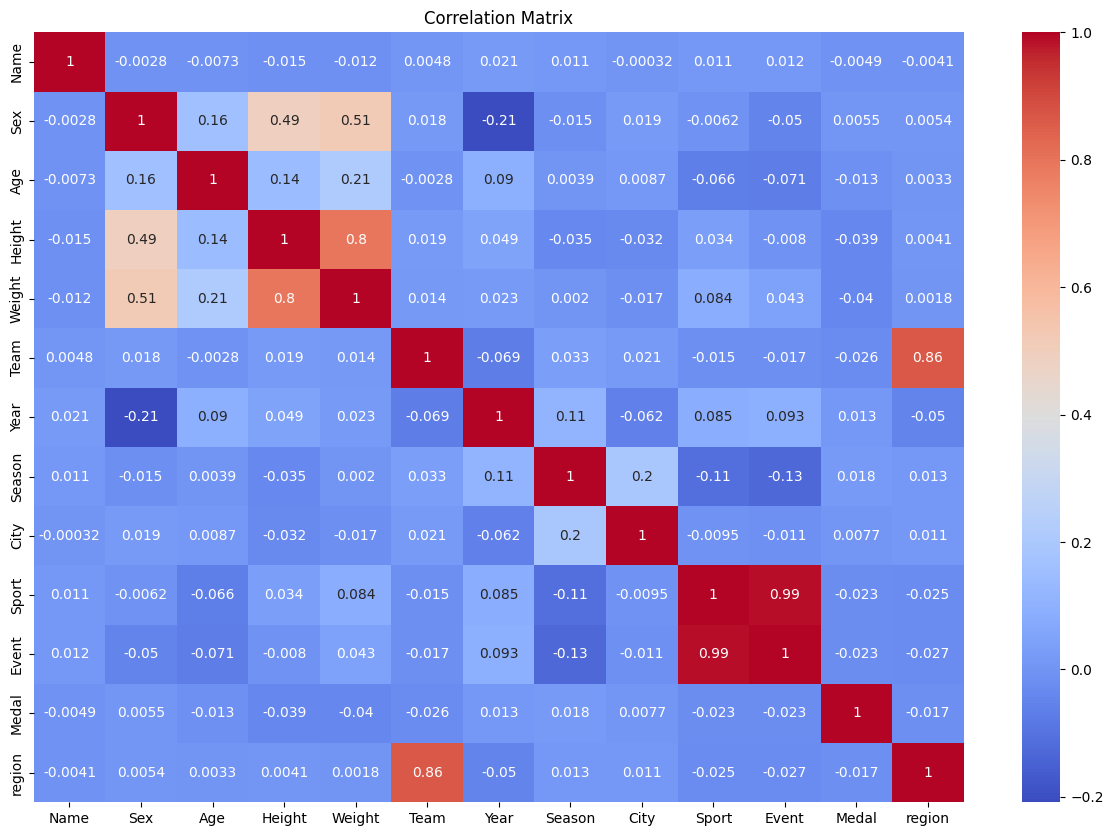

In [9]:
# Create a correlation matrix
correlation_matrix = data.corr()

import seaborn as sns
import matplotlib.pyplot as plt
# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numerical_columns = ['Age', 'Height', 'Weight']
scaler.fit_transform(data[numerical_columns])

os.chdir('/Users/harsha/Desktop/Codedex/encoding_data/')
joblib.dump(scaler, 'standard_scaler.pkl')

['standard_scaler.pkl']

In [11]:
from sklearn.model_selection import train_test_split

# Defining features and target variable
X = data.drop(columns=['Medal','Name'])
y = data['Medal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_model.predict(X_test)

In [13]:
# Evaluate the model
from sklearn.metrics import accuracy_score
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest Model: {rf_accuracy*100}")

Accuracy of Random Forest Model: 88.79161708637898


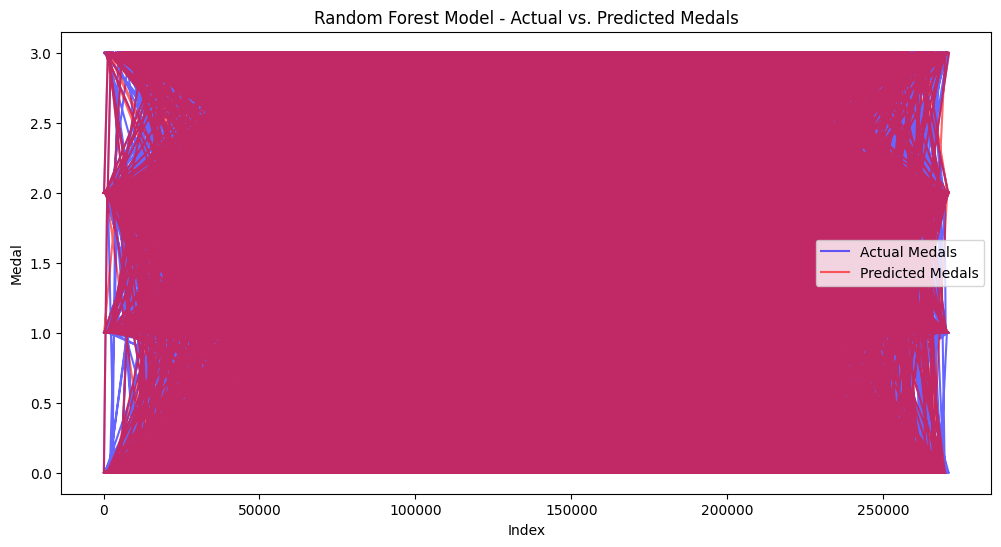

In [14]:
# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

import matplotlib.pyplot as plt
# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(results_df.index, results_df['Actual'], label='Actual Medals', color='blue', alpha=0.6)
plt.plot(results_df.index, results_df['Predicted'], label='Predicted Medals', color='red', alpha=0.6)
plt.xlabel('Index')
plt.ylabel('Medal')
plt.title('Random Forest Model - Actual vs. Predicted Medals')
plt.legend()
plt.show()

In [15]:
os.chdir('/Users/harsha/Desktop/Codedex/Models/')
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

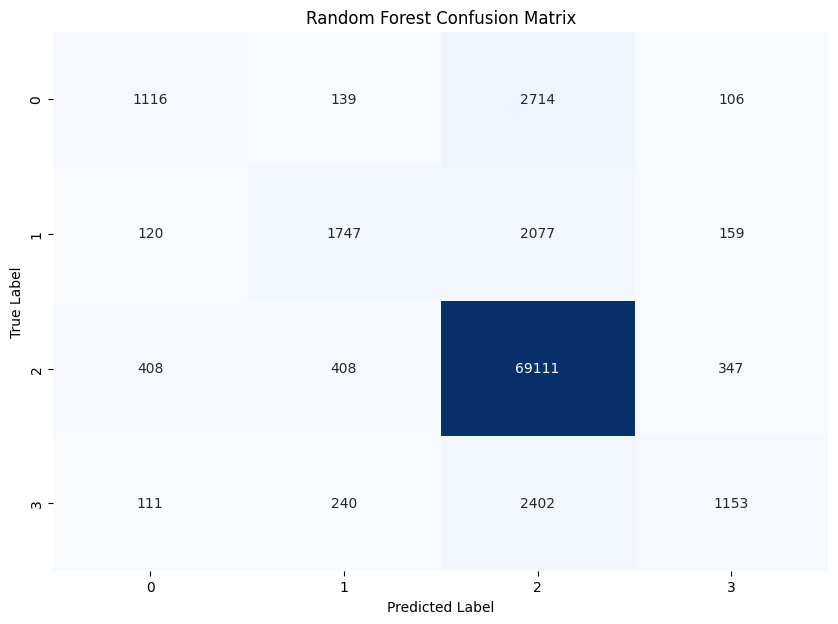

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()